In [25]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.models import Sequential
from keras.layers.core import Dense
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:

#Chargement des données
donnees = pd.read_csv("Rice_Cammeo_Osmancik.csv")

#Séparation des caractéristiques (X) et les étiquettes (y)
X = donnees.drop('Class', axis=1)
y = donnees['Class']



In [27]:

#la normalisation
Norm = MinMaxScaler()
X_Norm = Norm.fit_transform(X)

#sauvegarde de la normalisation
joblib.dump(Norm,'Normalisation.pkl')

['Normalisation.pkl']

In [28]:
#Encodage des étiquettes pour les transformer en valeurs numériques
Encode = LabelEncoder()
y_Encode = Encode.fit_transform(y)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_Norm, y_Encode, test_size=0.2, random_state=42)


In [30]:
def creer_modele(nb_couches, nb_neurones, activation):
    model = Sequential()
    
    model.add(Dense(nb_neurones[0], input_dim=X_Norm.shape[1], activation=activation))
    
    # Ajout des couches cachées supplémentaires
    for i in range(1, nb_couches):
        model.add(Dense(nb_neurones[i], activation=activation))
    
    # Couche de sortie avec 'softmax' pour la classification multiclass
    model.add(Dense(len(Encode.classes_), activation='softmax'))
    
    # Compilation du modèle
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [31]:
scenarios = [
    {"nb_couches": 2, "nb_neurones": [14,7], "activation": 'relu'},
    {"nb_couches": 3, "nb_neurones": [1, 64, 32], "activation": 'relu'},
    {"nb_couches": 2, "nb_neurones": [64, 32], "activation": 'tanh'},
    {"nb_couches": 3, "nb_neurones": [128, 64, 32], "activation": 'tanh'},
    {"nb_couches": 2, "nb_neurones": [64, 32], "activation": 'sigmoid'},
    {"nb_couches": 3, "nb_neurones": [128, 64, 32], "activation": 'sigmoid'},
]


In [36]:
resultats = []

for scenario in scenarios:
    print(f"Test du modèle avec {scenario['nb_couches']} couches, neurones {scenario['nb_neurones']}, activation {scenario['activation']}")
    
    # Création et entraînement du modèle
    model = creer_modele(scenario['nb_couches'], scenario['nb_neurones'], scenario['activation'])
    entrainement_model = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
    
    # Extraction des précisions d'entraînement et de validation
    Precision_d_entraînement = entrainement_model.history['accuracy'][-1] * 100
    Precision_de_validation = entrainement_model.history['val_accuracy'][-1] * 100
    
    # Stockage des résultats
    resultats.append({
        "nb_couches": scenario['nb_couches'],
        "nb_neurones": scenario['nb_neurones'],
        "activation": scenario['activation'],
        "Precision_d_entraînement": Precision_d_entraînement,
        "Precision_de_validation": Precision_de_validation
    })

    print(f"Précision d'entraînement : {Precision_d_entraînement:.2f}%")
    print(f"Précision de validation : {Precision_de_validation:.2f}%\n")

    # # Prédictions sur les données de test
    # y_pred = (model.predict(X_test) > 0.5).astype("int32")

    # # Calcul de la matrice de confusion
    # conf_matrix = confusion_matrix(y_test, y_pred)

    # # Tracé de la matrice de confusion
    # plt.figure(figsize=(8, 6))
    # sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
    #             xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    # plt.xlabel('Predicted')
    # plt.ylabel('Actual')
    # plt.title('Confusion Matrix')
    # plt.show()

        


Test du modèle avec 2 couches, neurones [14, 7], activation relu
Précision d'entraînement : 92.45%
Précision de validation : 91.80%

Test du modèle avec 3 couches, neurones [1, 64, 32], activation relu
Précision d'entraînement : 92.29%
Précision de validation : 91.64%

Test du modèle avec 2 couches, neurones [64, 32], activation tanh
Précision d'entraînement : 92.74%
Précision de validation : 92.30%

Test du modèle avec 3 couches, neurones [128, 64, 32], activation tanh
Précision d'entraînement : 92.78%
Précision de validation : 92.30%

Test du modèle avec 2 couches, neurones [64, 32], activation sigmoid
Précision d'entraînement : 91.96%
Précision de validation : 91.15%

Test du modèle avec 3 couches, neurones [128, 64, 32], activation sigmoid
Précision d'entraînement : 92.12%
Précision de validation : 91.31%



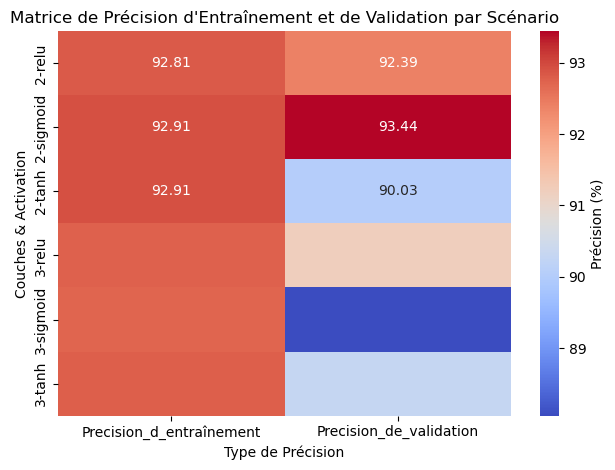

In [10]:
# Création d'une matrice de résultats avec pandas
df_resultats = pd.DataFrame(resultats)

# Création de la matrice des résultats
matrice_precisions = pd.pivot_table(df_resultats, 
                                    values=['Precision_d_entraînement', 'Precision_de_validation'], 
                                    index=['nb_couches', 'activation'])

# Utilisation de seaborn pour afficher la matrice des résultats
sns.heatmap(matrice_precisions, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Précision (%)'})

# Ajout d'un titre et des labels
plt.title('Matrice de Précision d\'Entraînement et de Validation par Scénario')
plt.ylabel('Couches & Activation')
plt.xlabel('Type de Précision')

# Affichage du graphique
plt.tight_layout()
plt.show()
